In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

In [2]:
sample_submission = pd.read_csv('sample_submission.csv')
test_features = pd.read_csv('test_features.csv')
train_data = pd.read_csv('train_data.csv')

In [3]:
sample_submission.head()
sample_submission.shape
sample_submission.dtypes

name     object
poi     float64
dtype: object

In [4]:
test_features.head()
test_features.shape
test_features.dtypes
num_test = test_features.shape[0]

In [5]:
train_data.head()
train_data.shape
train_data.dtypes
train_data.columns

Index(['name', 'bonus', 'deferral_payments', 'deferred_income',
       'director_fees', 'email_address', 'exercised_stock_options', 'expenses',
       'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi',
       'loan_advances', 'long_term_incentive', 'other', 'poi',
       'restricted_stock', 'restricted_stock_deferred', 'salary',
       'shared_receipt_with_poi', 'to_messages', 'total_payments',
       'total_stock_value'],
      dtype='object')

In [6]:
target = train_data['poi']
name = test_features['name']
train_data = train_data.drop(['poi'], axis=1)
data = pd.concat([test_features, train_data])
data = data.drop(['name','email_address'], axis=1)

In [7]:
data.shape
data.columns
data.dtypes

bonus                        float64
deferral_payments            float64
deferred_income              float64
director_fees                float64
exercised_stock_options      float64
expenses                     float64
from_messages                float64
from_poi_to_this_person      float64
from_this_person_to_poi      float64
loan_advances                float64
long_term_incentive          float64
other                        float64
restricted_stock             float64
restricted_stock_deferred    float64
salary                       float64
shared_receipt_with_poi      float64
to_messages                  float64
total_payments               float64
total_stock_value            float64
dtype: object

In [8]:
data.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,8.200000e+01,3.900000e+01,4.900000e+01,1.700000e+01,1.020000e+02,9.500000e+01,86.000000,86.000000,86.000000,4.000000e+00,6.600000e+01,9.300000e+01,1.100000e+02,1.800000e+01,9.500000e+01,86.000000,86.000000,1.250000e+02,1.260000e+02
mean,2.374235e+06,1.642674e+06,-1.140475e+06,1.668049e+05,5.987054e+06,1.087289e+05,608.790698,64.895349,41.232558,4.196250e+07,1.470361e+06,9.190650e+05,2.321741e+06,1.664106e+05,5.621943e+05,1176.465116,2073.860465,5.081526e+06,6.773957e+06
std,1.071333e+07,5.161930e+06,4.025406e+06,3.198914e+05,3.106201e+07,5.335348e+05,1841.033949,86.979244,100.073111,4.708321e+07,5.942759e+06,4.589253e+06,1.251828e+07,4.201494e+06,2.716369e+06,1178.317641,2582.700981,2.906172e+07,3.895777e+07
min,7.000000e+04,-1.025000e+05,-2.799289e+07,3.285000e+03,3.285000e+03,1.480000e+02,12.000000,0.000000,0.000000,4.000000e+05,6.922300e+04,2.000000e+00,-2.604490e+06,-7.576788e+06,4.770000e+02,2.000000,57.000000,1.480000e+02,-4.409300e+04
25%,4.312500e+05,8.157300e+04,-6.948620e+05,9.878400e+04,5.278862e+05,2.261400e+04,22.750000,10.000000,1.000000,1.600000e+06,2.812500e+05,1.215000e+03,2.540180e+05,-3.896218e+05,2.118160e+05,249.750000,541.250000,3.944750e+05,4.945102e+05
50%,7.693750e+05,2.274490e+05,-1.597920e+05,1.085790e+05,1.310814e+06,4.695000e+04,41.000000,35.000000,8.000000,4.176250e+07,4.420350e+05,5.238200e+04,4.517400e+05,-1.469750e+05,2.599960e+05,740.500000,1211.000000,1.101393e+06,1.102872e+06
75%,1.200000e+06,1.002672e+06,-3.834600e+04,1.137840e+05,2.547724e+06,7.995250e+04,145.500000,72.250000,24.750000,8.212500e+07,9.386720e+05,3.620960e+05,1.002370e+06,-7.500975e+04,3.121170e+05,1888.250000,2634.750000,2.093263e+06,2.949847e+06
max,9.734362e+07,3.208340e+07,-8.330000e+02,1.398517e+06,3.117640e+08,5.235198e+06,14368.000000,528.000000,609.000000,8.392500e+07,4.852193e+07,4.266759e+07,1.303223e+08,1.545629e+07,2.670423e+07,5521.000000,15149.000000,3.098866e+08,4.345095e+08


In [9]:
def na_check(data):
    data_na = data.isnull().sum()/len(data)*100
    data_na = data_na[data_na!=0].sort_values(ascending=False)
    display(data_na)
na_check(data)

loan_advances                97.260274
director_fees                88.356164
restricted_stock_deferred    87.671233
deferral_payments            73.287671
deferred_income              66.438356
long_term_incentive          54.794521
bonus                        43.835616
from_this_person_to_poi      41.095890
from_poi_to_this_person      41.095890
from_messages                41.095890
shared_receipt_with_poi      41.095890
to_messages                  41.095890
other                        36.301370
expenses                     34.931507
salary                       34.931507
exercised_stock_options      30.136986
restricted_stock             24.657534
total_payments               14.383562
total_stock_value            13.698630
dtype: float64

In [10]:
columns = [i for i in data.columns if i not in ['salary']]
data[columns] = data[columns].fillna(0)
data['salary'] = data['salary'].fillna(data['salary'].median())

In [11]:
na_check(data)

Series([], dtype: float64)

In [12]:
import matplotlib.pyplot as plt

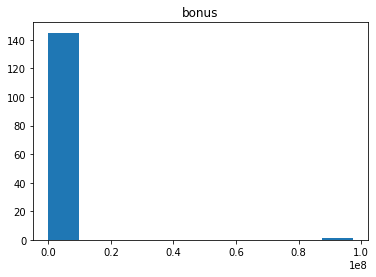

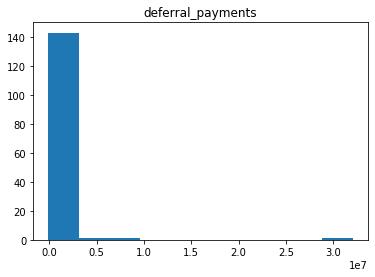

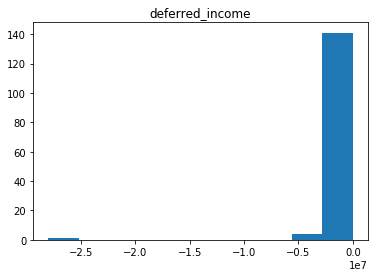

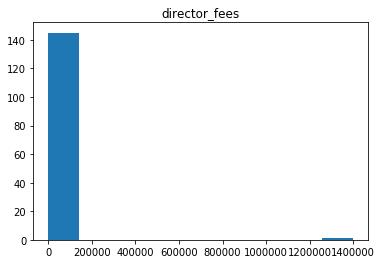

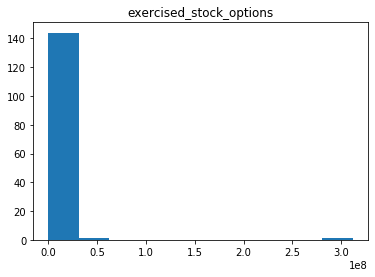

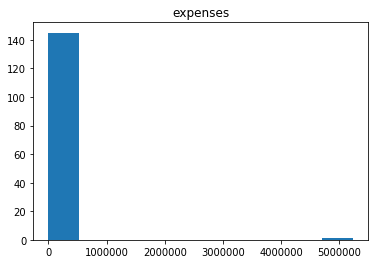

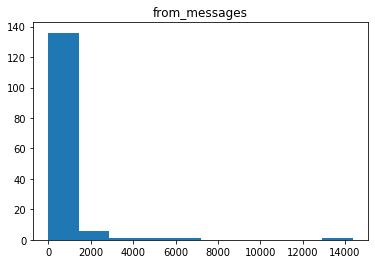

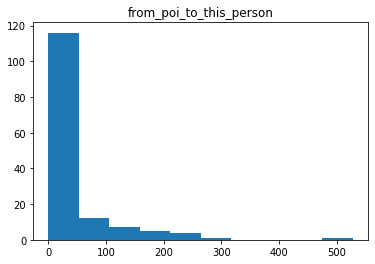

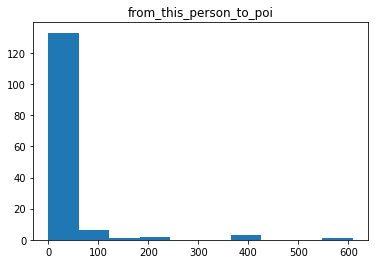

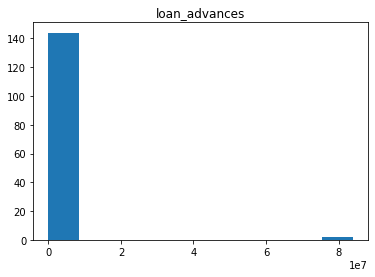

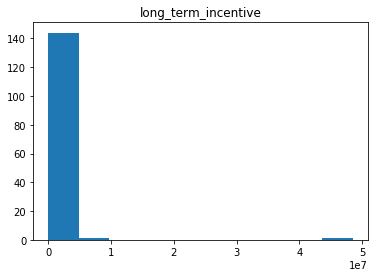

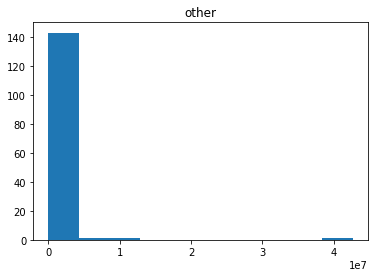

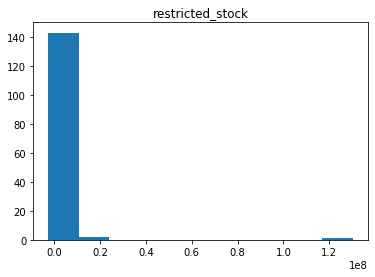

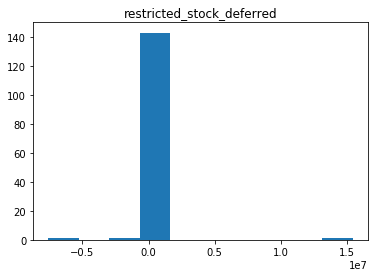

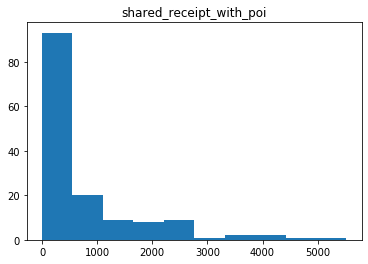

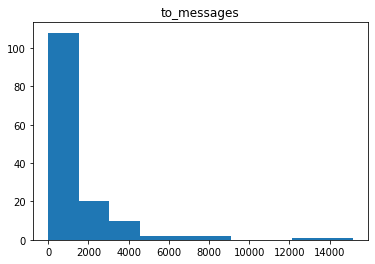

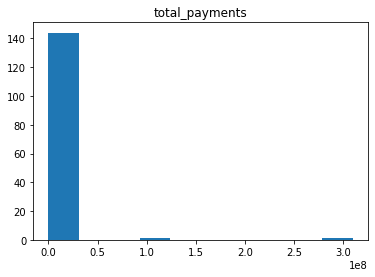

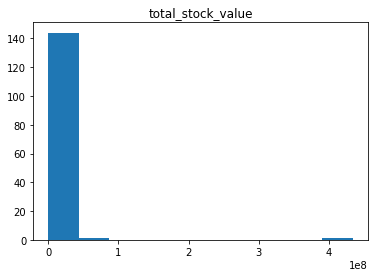

In [13]:
for i in columns:
    plt.hist(data[i])
    plt.title(i)
    plt.show()

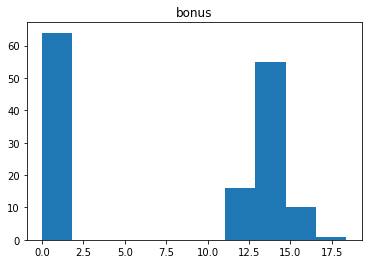

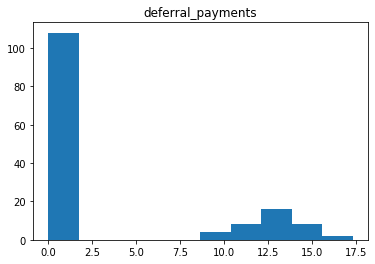

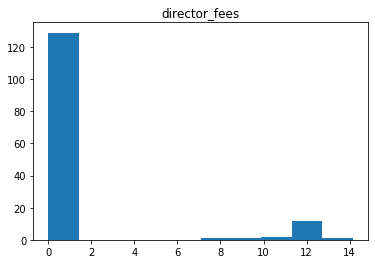

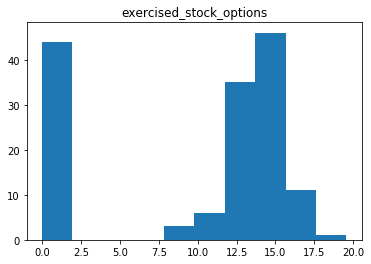

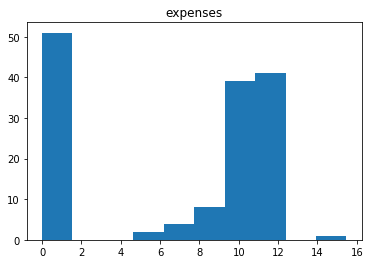

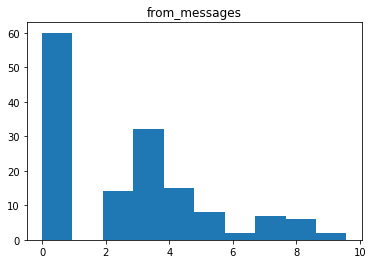

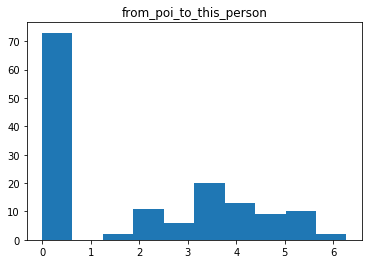

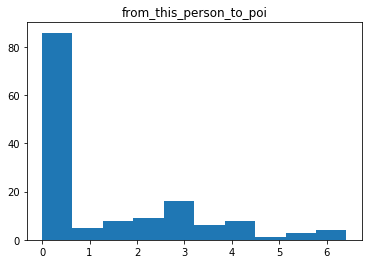

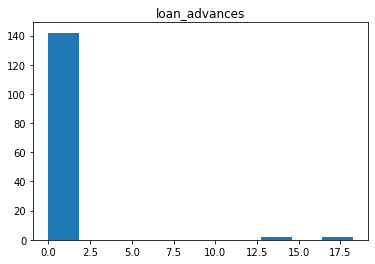

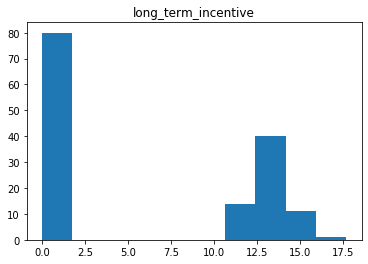

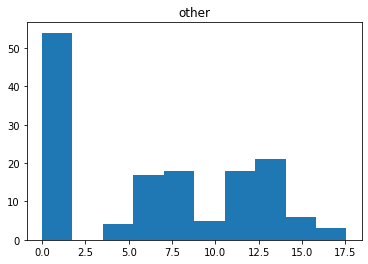

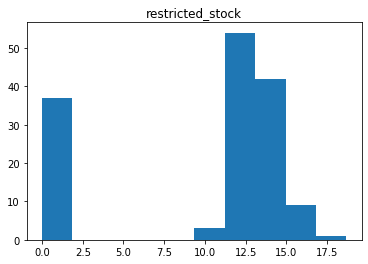

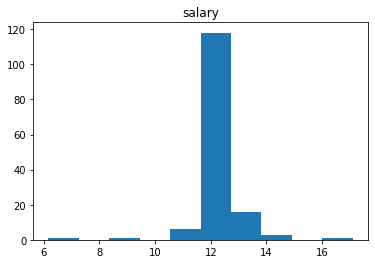

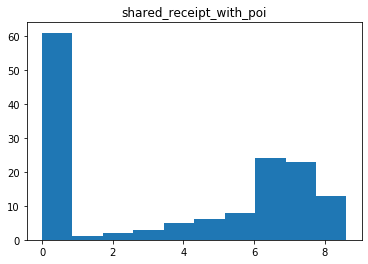

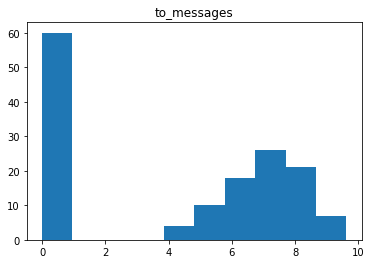

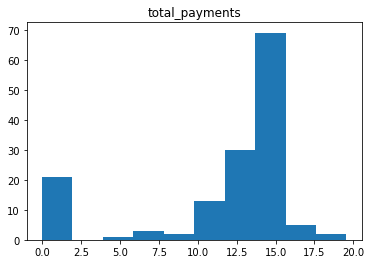

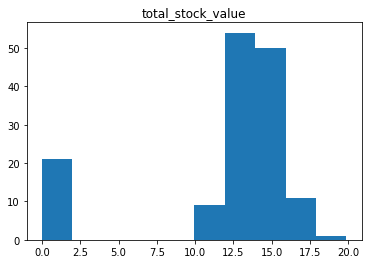

In [14]:
columns = [i for i in data.columns if i not in ['deferred_income', 'restricted_stock_deferred']]
data[columns] = data[columns].applymap(lambda i: np.log(i) if i>0 else 0)
for i in columns:
    plt.hist(data[i])
    plt.title(i)
    plt.show()

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
df_data = data
data = MinMaxScaler().fit_transform(data)
target_data = LabelEncoder().fit_transform(target)

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics

In [17]:
test_data = data[:num_test]
train_data = data[num_test:]
train_x_y1, test_x_y1, train_y_y1, test_y_y1 = train_test_split(train_data[target_data==1], target_data[target_data==1], test_size=5, random_state=42)
train_x_y0, test_x_y0, train_y_y0, test_y_y0 = train_test_split(train_data[target_data==0], target_data[target_data==0], test_size=5, random_state=42)
train_x, train_y = np.concatenate([train_x_y1, train_x_y0]), np.concatenate([train_y_y1, train_y_y0])
test_x, test_y = np.concatenate([test_x_y1, test_x_y0]), np.concatenate([test_y_y1, test_y_y0])

In [18]:
rf = RandomForestClassifier()
rf.fit(train_x, train_y)
rf_pred = rf.predict_proba(test_x)[:,1]
rf_pred = np.where(rf_pred>0.11, 1, 0)
metrics.accuracy_score(rf_pred, test_y)

0.7

In [19]:
gdbt = GradientBoostingClassifier()
gdbt.fit(train_x, train_y)
gdbt_pred = gdbt.predict_proba(test_x)[:,1]
gdbt_pred = np.where(gdbt_pred>0.11, 1, 0)
metrics.accuracy_score(gdbt_pred, test_y)

0.7

In [20]:
logistic = LogisticRegression()
logistic.fit(train_x, train_y)
logistic_pred = logistic.predict_proba(test_x)[:,1]
logistic_pred = np.where(logistic_pred>0.11, 1, 0)
metrics.accuracy_score(logistic_pred, test_y)

0.6

In [21]:
rf.feature_importances_

array([0.07829845, 0.00233566, 0.04796873, 0.        , 0.11195589,
       0.0689483 , 0.04553852, 0.05231384, 0.02798384, 0.00195122,
       0.05195306, 0.08951575, 0.10949071, 0.00106531, 0.0784182 ,
       0.04619103, 0.04123487, 0.06044112, 0.08439549])

In [22]:
index = df_data.columns[rf.feature_importances_>0.005]
data_with_feature = df_data[index]
data_with_feature = MinMaxScaler().fit_transform(data_with_feature)
train_with_feature = data_with_feature[num_test:]
test_with_feature = data_with_feature[:num_test]

In [23]:
train_x_y1, test_x_y1, train_y_y1, test_y_y1 = train_test_split(train_with_feature[target_data==1], target_data[target_data==1], test_size=5, random_state=42)
train_x_y0, test_x_y0, train_y_y0, test_y_y0 = train_test_split(train_with_feature[target_data==0], target_data[target_data==0], test_size=5, random_state=42)
train_x, train_y = np.concatenate([train_x_y1, train_x_y0]), np.concatenate([train_y_y1, train_y_y0])
test_x, test_y = np.concatenate([test_x_y1, test_x_y0]), np.concatenate([test_y_y1, test_y_y0])

In [24]:
rf = RandomForestClassifier()
rf.fit(train_x, train_y)
rf_pred = rf.predict_proba(test_x)[:,1]
rf_pred = np.where(rf_pred>0.11, 1, 0)
metrics.accuracy_score(rf_pred, test_y)

0.8

In [25]:
gdbt = GradientBoostingClassifier()
gdbt.fit(train_x, train_y)
gdbt_pred = gdbt.predict_proba(test_x)[:,1]
gdbt_pred = np.where(gdbt_pred>0.11, 1, 0)
metrics.accuracy_score(gdbt_pred, test_y)

0.7

In [26]:
logistic = LogisticRegression()
logistic.fit(train_x, train_y)
logistic_pred = logistic.predict_proba(test_x)[:,1]
logistic_pred = np.where(logistic_pred>0.11, 1, 0)
metrics.accuracy_score(logistic_pred, test_y)

0.6

In [27]:
train_with_feature.shape

(113, 15)

In [28]:
train_data.shape

(113, 19)

In [29]:
train_with_feature[target_data==1].shape

(13, 15)

In [30]:
logistic_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0])

In [31]:
gdbt_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0])

In [32]:
rf_pred

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0])

In [33]:
gdbt.predict_proba(test_x)[:,1]

array([1.50221654e-04, 6.52039065e-02, 9.99510748e-01, 9.19276686e-01,
       3.01505487e-01, 1.50221654e-04, 1.59954765e-04, 7.02801506e-04,
       9.08323570e-01, 1.50221654e-04])

In [40]:
submission_gdbt = pd.DataFrame({'name': name, 'poi': gdbt.predict_proba(test_with_feature)[:,1]})
submission_gdbt.to_csv('submission_gdbt.csv', index=False)

In [41]:
submission_log = pd.DataFrame({'name': name, 'poi': logistic.predict_proba(test_with_feature)[:,1]})
submission_log.to_csv('submission_log.csv', index=False)

In [42]:
submission_rf = pd.DataFrame({'name': name, 'poi': rf.predict_proba(test_with_feature)[:,1]})
submission_rf.to_csv('submission_rf.csv', index=False)

In [45]:
pred_blending = 0.3*gdbt.predict_proba(test_with_feature)[:,1] + 0.3*logistic.predict_proba(test_with_feature)[:,1] + 0.4*rf.predict_proba(test_with_feature)[:,1]
submission_blending = pd.DataFrame({'name': name, 'poi': pred_blending})
submission_blending.to_csv('submission_blending.csv', index=False)